# Sound classification with Python
Can we predict if a motor has recieved preventative maintenance based on the sound it makes?  In this notebook, two audio clips are analyzed, a motor that is due for maintenance, and a motor that has recieived maintenance.  The objective is to create a model that can accurately differenciate between the two given a very short sample of audio.  This workflow was inspired by this [post](https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
%matplotlib inline

# Load clip 1, for a motor due for maintenance
The sound clip can be played from within the notebook, and a spectrogram can be presented using the `librosa` library:

In [2]:
audio_path1 = './ExampleData/PreMaint.wav'
x1 , sr = librosa.load(audio_path1)
ipd.Audio(audio_path1,rate=sr)

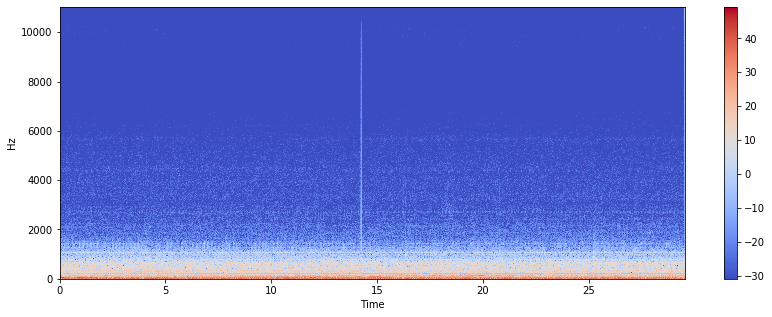

In [3]:
X = librosa.stft(x1)
Xdb1 = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb1, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Load clip 2, for a motor that has recieved maintenance

In [4]:
audio_path2 = './ExampleData/PostMaint.wav'
x2 , sr = librosa.load(audio_path2)
ipd.Audio(audio_path2,rate=sr)


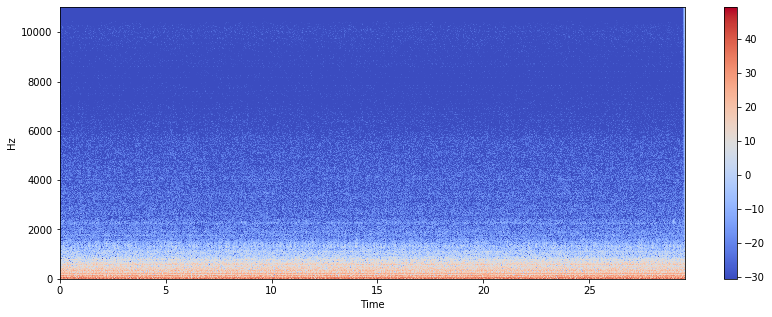

In [5]:
X = librosa.stft(x2)
Xdb2 = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb2, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


Ok, the clips sound similar and have roughly similar spectrograms.  Use an empirical model to differentiate the two.

# Predictive Modeling

Make a machine learning model to distinguish the sounds from each other.  First treat each of the short-term FT slices of sound as one observation.  Out of curiousity, how long were the clips used to generate each of the x-axis points in the spectrum?  

In [10]:
print('Each slice is {:.3} ms'.format(len(x2)/sr/Xdb2.shape[1]*1000))

Each slice is 23.2 ms


Next, combine the data, with a corresponding label (0 or 1), and split the data set at random.  For the purpose of this example we will only take 5 of the frequencies for each time slice.

In [7]:
from sklearn.model_selection import train_test_split
X = np.hstack((Xdb1,Xdb2)).T
y = np.hstack((np.zeros(Xdb1.shape[1]),np.ones(Xdb2.shape[1])))
X_train, X_test, y_train, y_test = train_test_split(X[:,600:605], y, test_size=0.50, random_state=42)

Try a couple of models: logistic regression and lightGBM

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',max_iter=2000)
lr.fit(X_train,y_train)
score = lr.score(X_test, y_test)
print('Accuracy with Logistic Regression: {:.3} %'.format(score*100))

Accuracy with Logistic Regression: 82.8 %


In [9]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
score = lgbm.score(X_test,y_test)
print('Accuracy with Light GBM: {:.3} %'.format(score*100))

Accuracy with Light GBM: 99.6 %


The more modern light GBM model significantly outperforms the simpler logistic regression model for the case that was constructed here.  Of course, the one example of sound collected for the pre- and post-maintenance is not sufficient for a real application.